# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Building Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

# Building Neural Network
import tensorflow.keras as k

# Reading Data

In [2]:
train = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\spotify-popularity-prediction-v2\train.csv")
test = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\spotify-popularity-prediction-v2\test.csv")

test_id = test["id"]

In [3]:
train.head(2)

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658,8,0.950,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978,4,0.396,-6.534,0,2014-05-02,0.0396,130.007,0.516,0


In [4]:
test.head(2)

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence
0,6IfByzdeGt3iIsakTp16vz,['Amanda Miguel'],Ámame una Vez Más,1996,0.521,0.668,266173,0.452,0,0.000009,9,0.0652,-9.318,1,1996-01-01,0.0314,87.967,0.434
1,17TO3XH1slhDyqnwypne06,['Joe Cocker'],Let It Be,1969,0.230,0.468,300560,0.280,0,0.005360,0,0.1200,-11.602,1,1969-11-01,0.0291,108.348,0.346


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             12

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43058 entries, 0 to 43057
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                43058 non-null  object 
 1   artists           43058 non-null  object 
 2   name              43058 non-null  object 
 3   year              43058 non-null  int64  
 4   acousticness      43058 non-null  float64
 5   danceability      43058 non-null  float64
 6   duration_ms       43058 non-null  int64  
 7   energy            43058 non-null  float64
 8   explicit          43058 non-null  int64  
 9   instrumentalness  43058 non-null  float64
 10  key               43058 non-null  int64  
 11  liveness          43058 non-null  float64
 12  loudness          43058 non-null  float64
 13  mode              43058 non-null  int64  
 14  release_date      43058 non-null  object 
 15  speechiness       43058 non-null  float64
 16  tempo             43058 non-null  float6

# Data Cleaning

In [7]:
def clean_data(data):
    column = ["id" , "release_date"]
    for col in column:
        data.drop(columns=col, axis=1, inplace=True)
    return data

train = clean_data(train)
test = clean_data(test)

In [8]:
train.head(5)

,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity
0,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,0.0408,122.289,0.546,24
1,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,0.0396,130.007,0.516,0
2,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,0.0577,83.244,0.807,38
3,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,0.0268,82.302,0.196,40
4,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,0.0283,77.854,0.239,20


In [9]:
test.head(5)

,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,['Amanda Miguel'],Ámame una Vez Más,1996,0.5210,0.668,266173,0.452,0,0.000009,9,0.0652,-9.318,1,0.0314,87.967,0.434
1,['Joe Cocker'],Let It Be,1969,0.2300,0.468,300560,0.280,0,0.005360,0,0.1200,-11.602,1,0.0291,108.348,0.346
2,['Los Bukis'],Sabes,1984,0.0425,0.315,169827,0.543,0,0.000019,1,0.1420,-11.942,1,0.0352,158.734,0.423
3,['Depeche Mode'],Master and Servant,1985,0.1050,0.584,229360,0.866,0,0.001810,10,0.0383,-17.319,0,0.0401,127.783,0.695
4,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané),1999,0.0344,0.849,213907,0.635,1,0.000000,0,0.0820,-9.425,1,0.2660,92.003,0.856


In [10]:
def Encoder(data):
    la = LabelEncoder()
    columns = ["name", "artists"]
    for col in columns:
        data[col] = la.fit_transform(data[col])
    return data

train = Encoder(train)
test = Encoder(test)

In [11]:
test.head(5)

,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,681,38140,1996,0.5210,0.668,266173,0.452,0,0.000009,9,0.0652,-9.318,1,0.0314,87.967,0.434
1,6720,18674,1969,0.2300,0.468,300560,0.280,0,0.005360,0,0.1200,-11.602,1,0.0291,108.348,0.346
2,8230,27195,1984,0.0425,0.315,169827,0.543,0,0.000019,1,0.1420,-11.942,1,0.0352,158.734,0.423
3,3367,20573,1985,0.1050,0.584,229360,0.866,0,0.001810,10,0.0383,-17.319,0,0.0401,127.783,0.695
4,9744,16491,1999,0.0344,0.849,213907,0.635,1,0.000000,0,0.0820,-9.425,1,0.2660,92.003,0.856


In [12]:
train["year"].value_counts()

2020    2740
2018    1927
2013    1867
2016    1728
2019    1701
        ... 
1925     213
1924     179
1923     140
1921     115
1922      95
Name: year, Length: 102, dtype: int64

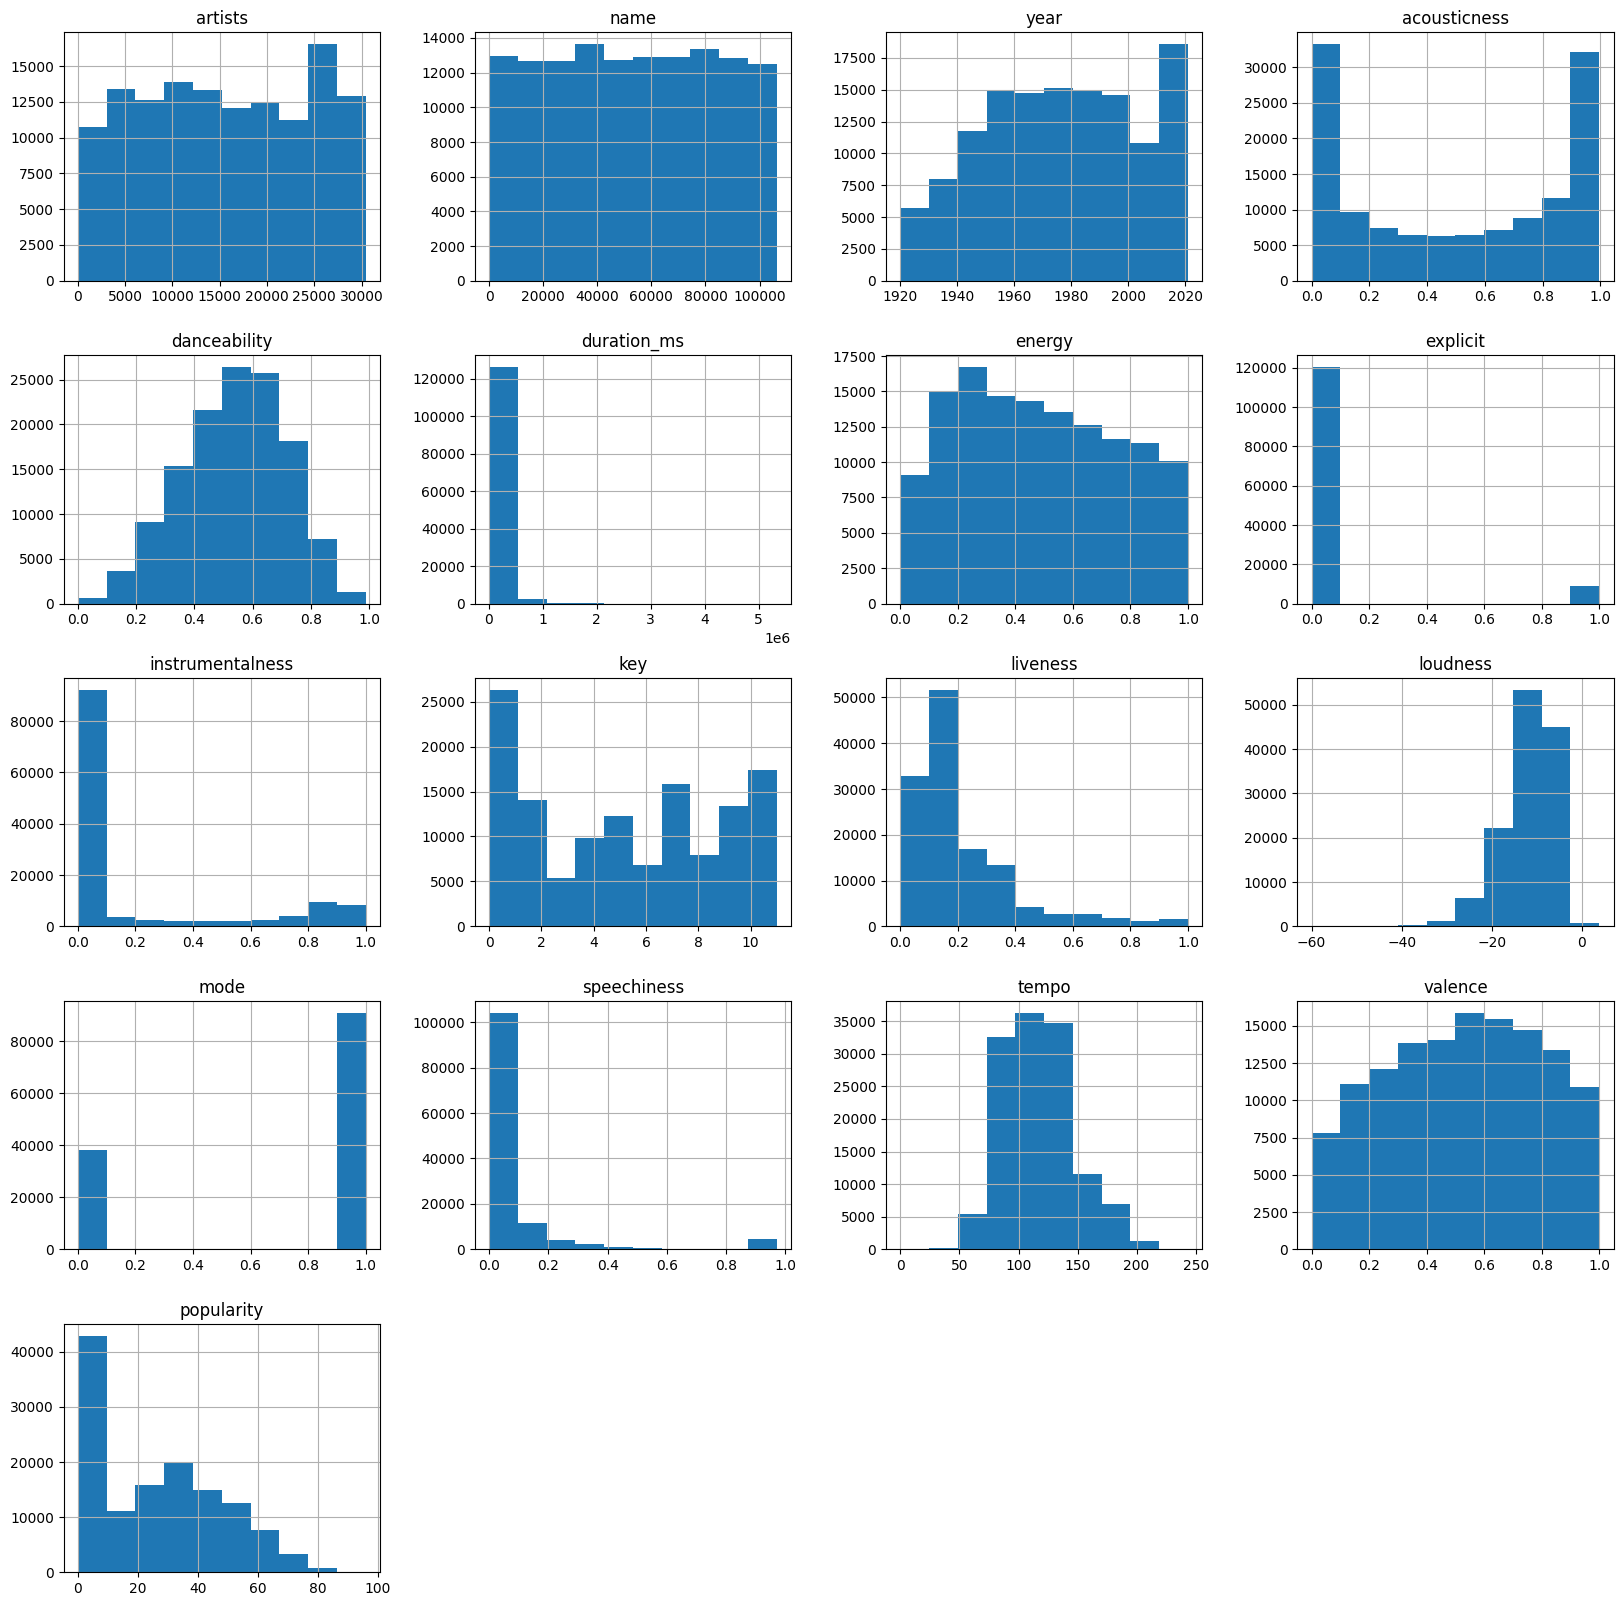

In [13]:
train.hist(figsize=(20, 20));

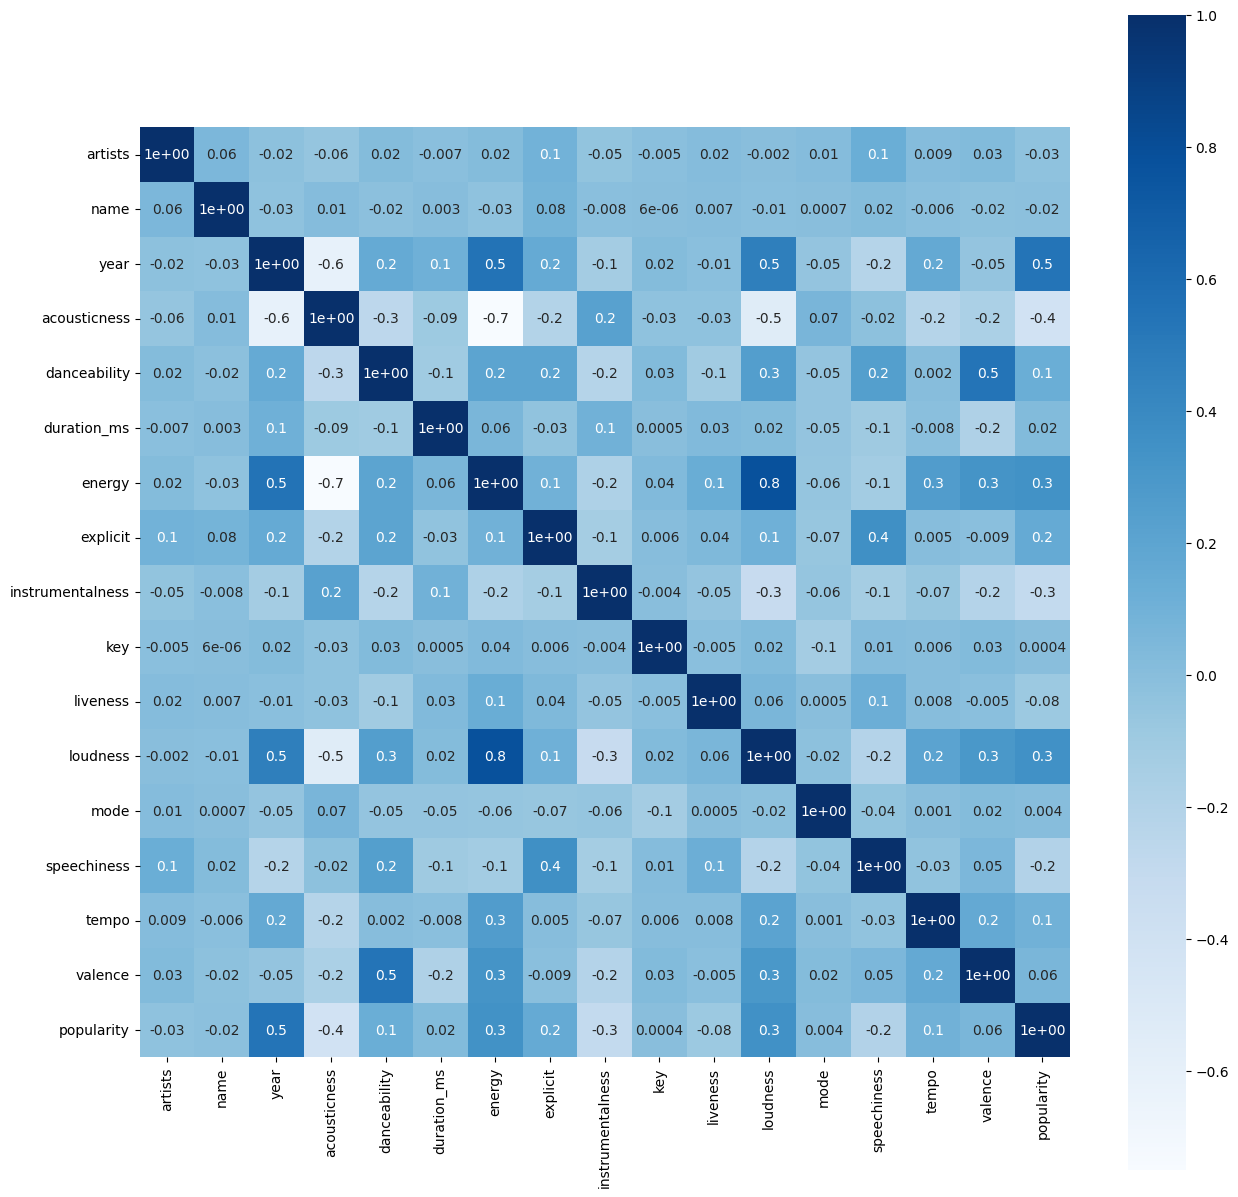

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), fmt="0.1", square=True, cmap="Blues", annot=True);

# Make Standardization

In [15]:
def normaliz(data):
    columns = ["year", "tempo", "key"]
    for col in columns:
        data[col] = (data[col].max() - data[col]) / data[col].mean()
    return data

train = normaliz(train)
test = normaliz(test)

In [16]:
test.head()

,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,681,38140,0.012648,0.5210,0.668,266173,0.452,0,0.000009,0.384879,0.0652,-9.318,1,0.0314,1.272922,0.434
1,6720,18674,0.026308,0.2300,0.468,300560,0.280,0,0.005360,2.116837,0.1200,-11.602,1,0.0291,1.098608,0.346
2,8230,27195,0.018719,0.0425,0.315,169827,0.543,0,0.000019,1.924397,0.1420,-11.942,1,0.0352,0.667670,0.423
3,3367,20573,0.018213,0.1050,0.584,229360,0.866,0,0.001810,0.192440,0.0383,-17.319,0,0.0401,0.932386,0.695
4,9744,16491,0.011130,0.0344,0.849,213907,0.635,1,0.000000,2.116837,0.0820,-9.425,1,0.2660,1.238403,0.856


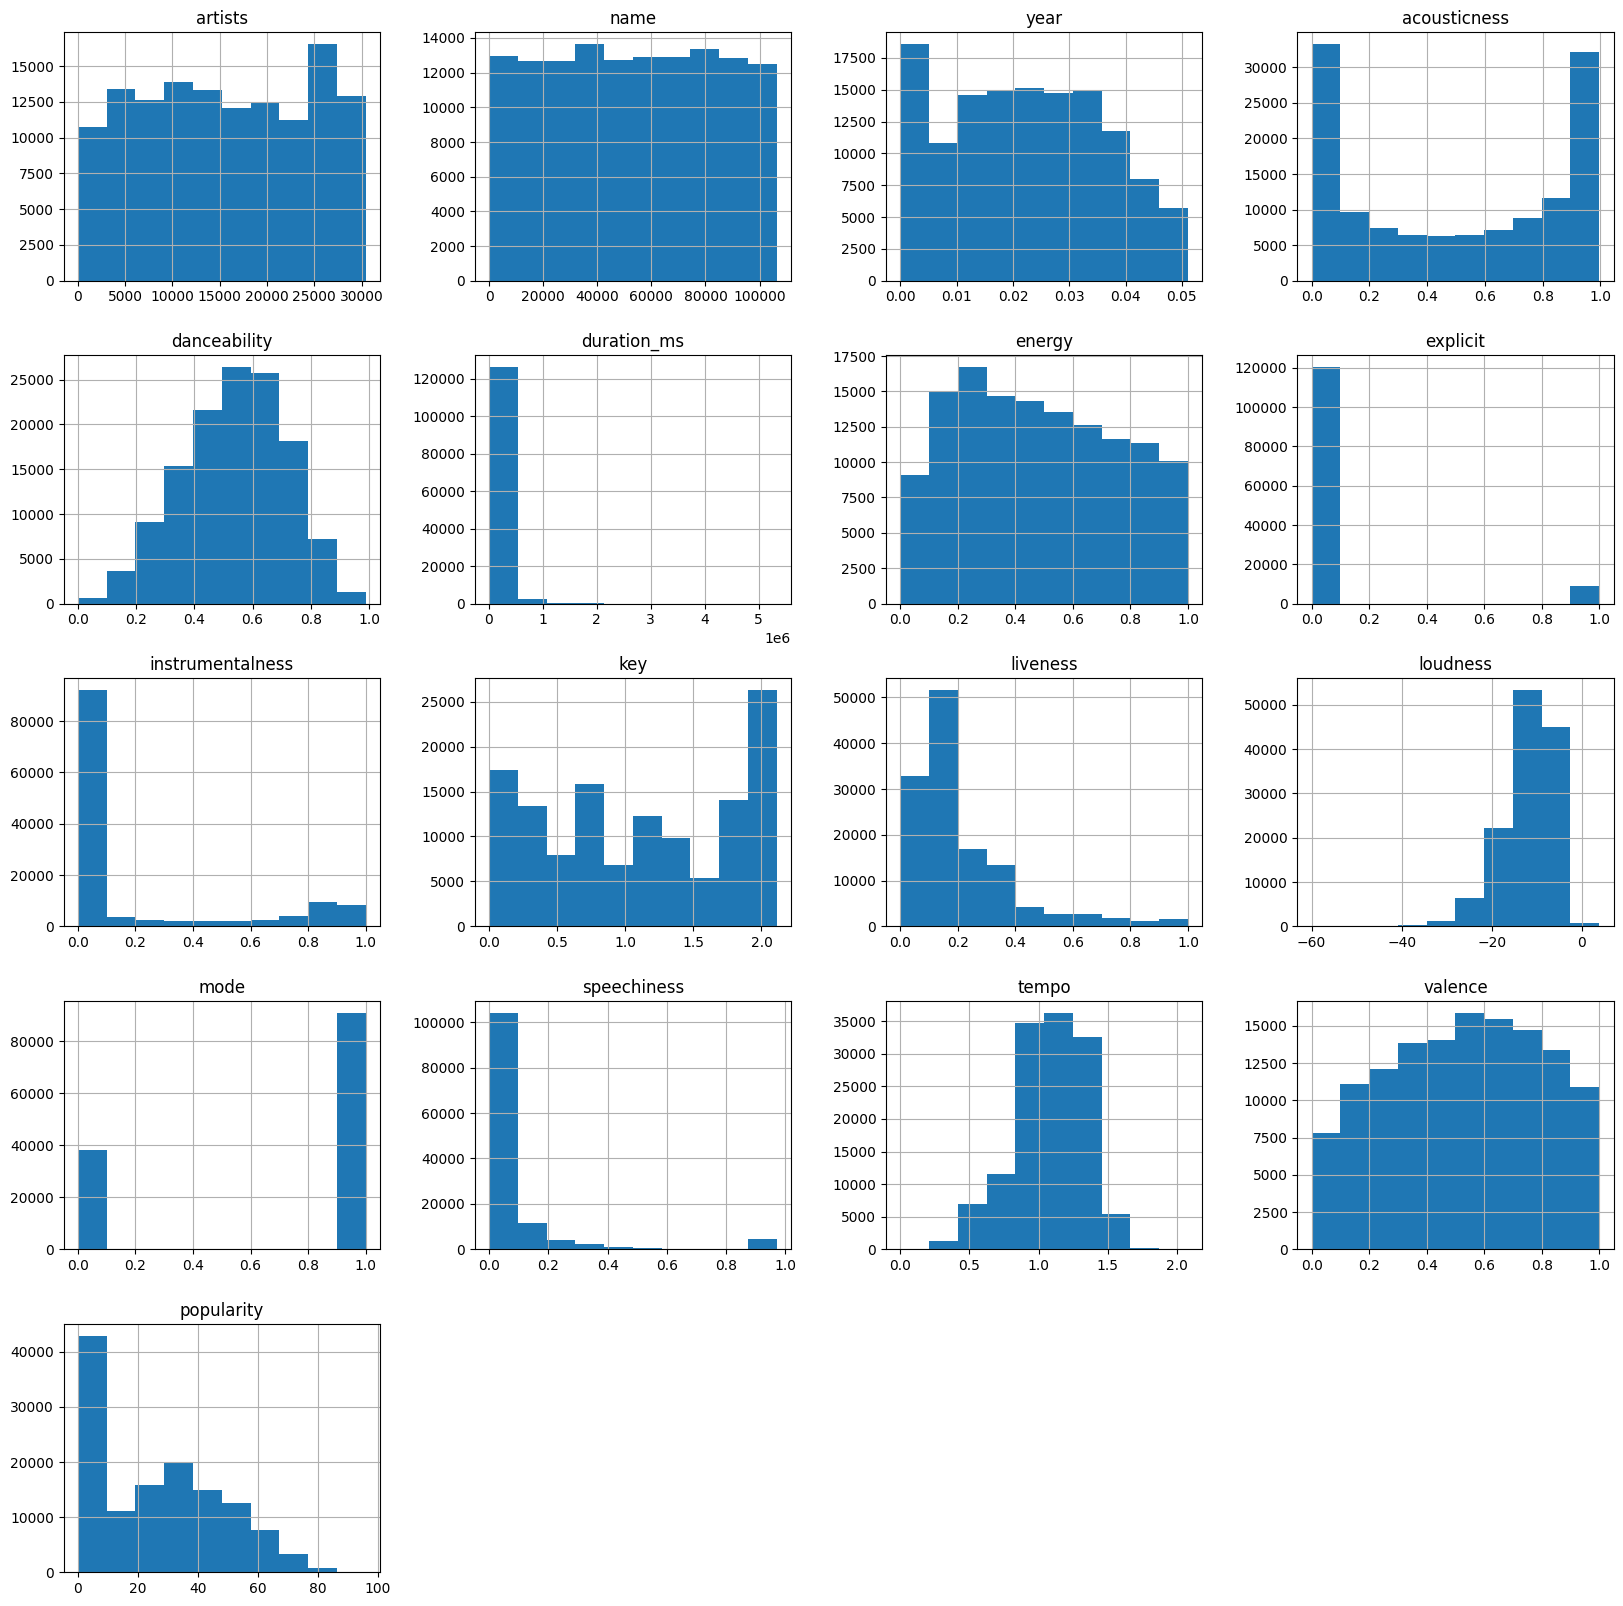

In [17]:
train.hist(figsize=(20, 20));

## Make Log Transform

In [17]:
def log_transform(data):
    columns = ["liveness", "speechiness", "duration_ms", "instrumentalness"]
    for col in columns:
        data[col] = np.log(data[col])
        data[col] = data[col].replace([-np.inf, np.inf], data[col].median())
    return data

train = log_transform(train)
test = log_transform(test)

C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\osama\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in l

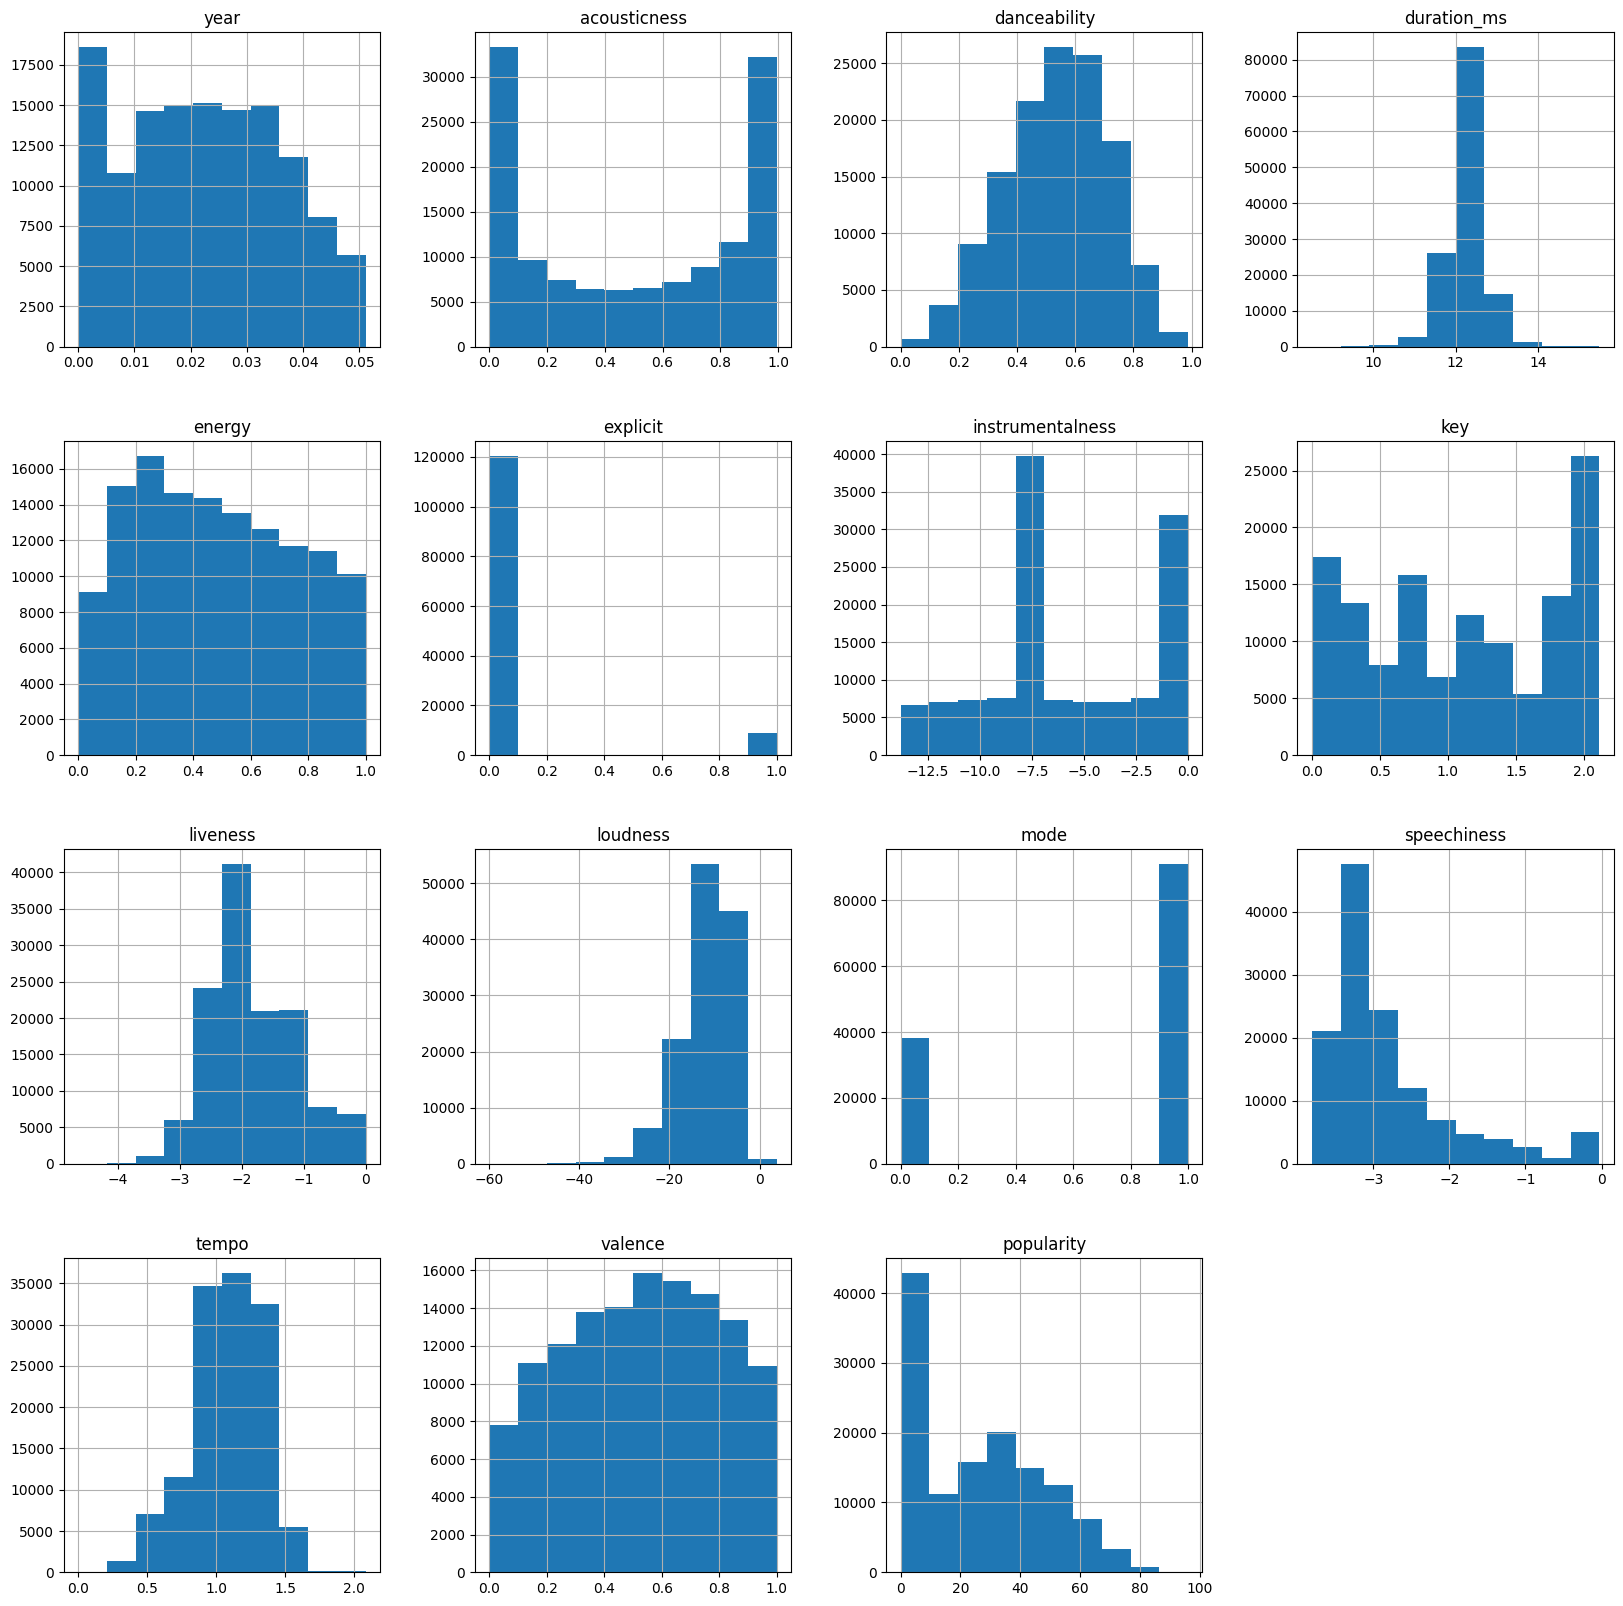

In [18]:
train.hist(figsize=(20, 20));

# Splitting Model

In [18]:
X = train.drop(columns="popularity", axis=1)
Y = train["popularity"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Building Model

# Model 0 ==> Best Model (TabularPredictor)

In [19]:
from autogluon.tabular import TabularPredictor, TabularDataset

In [21]:
predict = TabularPredictor(label="popularity", problem_type="regression", eval_metric="root_mean_squared_error")
predict.fit(train)


No path specified. Models will be saved in: "AutogluonModels\ag-20230922_000817\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230922_000817\"
AutoGluon Version:  0.8.2
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   99.14 GB / 255.28 GB (38.8%)
Train Data Rows:    129172
Train Data Columns: 16
Label Column: popularity
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9281.81 MB
	Train Data (Original)  Memory Usage: 15.5 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify speci

[1000]	valid_set's rmse: 12.2256
[2000]	valid_set's rmse: 12.0586
[3000]	valid_set's rmse: 11.979
[4000]	valid_set's rmse: 11.9332
[5000]	valid_set's rmse: 11.9081
[6000]	valid_set's rmse: 11.8755
[7000]	valid_set's rmse: 11.863
[8000]	valid_set's rmse: 11.8548
[9000]	valid_set's rmse: 11.8448
[10000]	valid_set's rmse: 11.8353


	-11.8269	 = Validation score   (-root_mean_squared_error)
	19.46s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 11.7438
[2000]	valid_set's rmse: 11.5666
[3000]	valid_set's rmse: 11.5221
[4000]	valid_set's rmse: 11.51


	-11.4965	 = Validation score   (-root_mean_squared_error)
	7.76s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-11.8218	 = Validation score   (-root_mean_squared_error)
	61.73s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-11.3702	 = Validation score   (-root_mean_squared_error)
	184.48s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-12.2829	 = Validation score   (-root_mean_squared_error)
	9.58s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-12.6228	 = Validation score   (-root_mean_squared_error)
	108.09s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-11.541	 = Validation score   (-root_mean_squared_error)
	8.61s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-13.2033	 = Validation score   (-root_mean_squared_error)
	180.44s	 = Training   runtime
	0.02s	 = Va

[1000]	valid_set's rmse: 11.4948
[2000]	valid_set's rmse: 11.3833
[3000]	valid_set's rmse: 11.3402
[4000]	valid_set's rmse: 11.3326
[5000]	valid_set's rmse: 11.3292
[6000]	valid_set's rmse: 11.3393


	-11.3251	 = Validation score   (-root_mean_squared_error)
	20.22s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-11.1997	 = Validation score   (-root_mean_squared_error)
	0.26s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 604.42s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20230922_000817\")


In [22]:
preds = predict.predict(test)
preds

0        48.284019
1        32.326580
2        36.019268
3        36.113228
4        45.044579
           ...    
43053    19.119469
43054     0.991105
43055    38.415573
43056    56.588264
43057    51.421597
Name: popularity, Length: 43058, dtype: float32

In [23]:
submittion = pd.DataFrame({"id": test_id.values,
                           "popularity": preds.values})
submittion

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,48.284019
1,17TO3XH1slhDyqnwypne06,32.326580
2,5chxjST0MfWZPsaHrWgiqe,36.019268
3,4Db6PxFIiK1a6nCEJABTHk,36.113228
4,3MPKTMJIxlORqcxw542HHK,45.044579
...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,19.119469
43054,3gh5bl5nBDN6ubcbxltKdr,0.991105
43055,6gVkG8f7ldsQs0jAI8cB4X,38.415573
43056,6n6OQfBpCgzF9oEg8zhBN7,56.588264


In [24]:
submittion.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\spotify-popularity-prediction-v2\submittion.csv", index=False)

## 1 - Model 1 ==> SGDRegressor

In [25]:
for col in ["l1", "l2", "elasticnet"]:
    model_sgd = SGDRegressor(max_iter=10000, penalty=col, tol=0.000001)
    model_sgd.fit(x_train, y_train)
    
    print("The Accuracy Training Data is ", model_sgd.score(x_train, y_train))
    print("The Accuracy Testing Data is ", model_sgd.score(x_test, y_test))
    mse_sgd = model_sgd.predict(x_test)
    print(mean_squared_error(y_test, mse_sgd) ** 0.5)

The Accuracy Training Data is  -6.209438155004195e+34
The Accuracy Testing Data is  -5.6649187730078785e+34
5.236739090022817e+18
The Accuracy Training Data is  -2.6734093383514656e+35
The Accuracy Testing Data is  -2.4461828898092248e+35
1.0881995829113119e+19
The Accuracy Training Data is  -1.2319642367380176e+34
The Accuracy Testing Data is  -1.0526449657813971e+34
2.2573819700384184e+18


## 2 - Model 2 ==> RandomForest

In [32]:
model_rf1 = RandomForestRegressor()
model_rf1.fit(x_train, y_train)
model_rf1.fit(x_train, y_train)
    
print("The Accuracy Training Data is ", model_rf1.score(x_train, y_train))
print("The Accuracy Training Data is ", model_rf1.score(X, Y))
print("The Accuracy Testing Data is ", model_rf1.score(x_test, y_test))
mse_rf1 = model_rf1.predict(x_test)
print(mean_squared_error(y_test, mse_rf1) ** 0.5)

The Accuracy Training Data is  0.9573094844210599
The Accuracy Training Data is  0.9048172170932791
The Accuracy Testing Data is  0.6978457202166548
12.094236812298178


In [38]:
model_rf = RandomForestRegressor(n_estimators=200, max_features="log2", criterion="friedman_mse", verbose=6)
model_rf.fit(X, Y)
    
print("The Accuracy Training Data is ", model_rf.score(x_train, y_train))
print("The Accuracy Training Data is ", model_rf.score(X, Y))
print("The Accuracy Testing Data is ", model_rf.score(x_test, y_test))
mse_rf = model_rf.predict(x_test)
print(mean_squared_error(y_test, mse_rf) ** 0.5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 3 of 200


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


building tree 4 of 200


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


building tree 5 of 200


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s


building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

The Accuracy Training Data is  0.953986400887777


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


The Accuracy Training Data is  0.9538510326588208


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


The Accuracy Testing Data is  0.953315870629091
4.753885584484607


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished


## Make Grid Search For RandomForest

In [23]:
# param = {"n_estimators": np.arange(100, 500, 100),
#          "max_depth": np.arange(15, 25, 1),
#          "min_samples_split": np.arange(1,5)}

# new_model_random = GridSearchCV(estimator=RandomForestRegressor(),
#                                param_grid=param,
#                                verbose=6,
#                                cv=5,
#                                n_jobs=-1)

# new_model_random.fit(x_train, y_train)

In [24]:
# print("The Accuracy Training Data is ", new_model_random.score(x_train, y_train))
# print("The Accuracy Testing Data is ", new_model_random.score(x_test, y_test))

# mse_rf2 = new_model_random.predict(x_test)
# print(mean_squared_error(y_test, mse_rf2) ** 0.5)

## 3 - Model 3 ==> AdaBoost

In [42]:
Adaboost_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1000,
                                                                 random_state=42),
                                  loss="square",
                                  n_estimators=100,
                                  learning_rate=0.1)


Adaboost_reg.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

mse_ad = Adaboost_reg.predict(x_test)
print(mean_squared_error(y_test, mse_ad) ** 0.5)

The predict Score Train is ==> 0.9986639062935199
%----------------------------------------------------------%
The predict Score Test is ==> 0.675536738680867
12.532763882562794


In [43]:
Adaboost_reg.fit(x_test, y_test)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

mse_ad = Adaboost_reg.predict(x_test)
print(mean_squared_error(y_test, mse_ad) ** 0.5)

The predict Score Train is ==> 0.6408402851403643
%----------------------------------------------------------%
The predict Score Test is ==> 0.9993444203627161
0.5633480830952884


## 4 - Model 4 ==> XGBoost

In [41]:
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=500,
                              learning_rate=0.1)

model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

mse_xgb = model_xgb.predict(x_test)
print(mean_squared_error(y_test, mse_xgb) ** 0.5)

The predict Score Train is ==> 0.9986846877939014
%----------------------------------------------------------%
The predict Score Test is ==> 0.6769139781398517
12.506136873604202


# Building Neural Network

In [39]:
model = k.models.Sequential([
    k.layers.Dense(512, activation="relu"),
    k.layers.Dense(64, activation="relu"),
    k.layers.Dense(1, activation="linear")
])

model.compile(optimizer=k.optimizers.Adam(learning_rate=0.001, ), loss="mse")

In [42]:
model.fit(X, Y, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
4037/4037 [==============================] - 5s 1ms/step - loss: 200.3030 - val_loss: 196.5125
Epoch 2/10
4037/4037 [==============================] - 4s 1ms/step - loss: 198.1579 - val_loss: 207.2659
Epoch 3/10
4037/4037 [==============================] - 5s 1ms/step - loss: 197.3585 - val_loss: 205.8530
Epoch 4/10
4037/4037 [==============================] - 5s 1ms/step - loss: 196.1380 - val_loss: 191.6510
Epoch 5/10
4037/4037 [==============================] - 5s 1ms/step - loss: 194.1881 - val_loss: 197.1379
Epoch 6/10
4037/4037 [==============================] - 5s 1ms/step - loss: 192.9662 - val_loss: 200.2362
Epoch 7/10
4037/4037 [==============================] - 5s 1ms/step - loss: 192.6066 - val_loss: 193.5946
Epoch 8/10
4037/4037 [==============================] - 5s 1ms/step - loss: 191.9068 - val_loss: 191.5500
Epoch 9/10
4037/4037 [==============================] - 5s 1ms/step - loss: 190.3139 - val_loss: 200.1673
Epoch 10/10
4037/4037 [=======================

# Target Acheive RMSE < 4.75


In [44]:
rmse = Adaboost_reg.predict(x_test)
print(mean_squared_error(y_test, rmse) ** 0.5)

0.5633480830952884


# Make Submittion

In [45]:
prediction = Adaboost_reg.predict(test)
# prediction = [i[0] for i in prediction]
# prediction

In [46]:
submittion = pd.DataFrame({"id": test_id.values,
                           "popularity": prediction})
submittion

,id,popularity
0,6IfByzdeGt3iIsakTp16vz,44.0
1,17TO3XH1slhDyqnwypne06,27.0
2,5chxjST0MfWZPsaHrWgiqe,35.0
3,4Db6PxFIiK1a6nCEJABTHk,32.0
4,3MPKTMJIxlORqcxw542HHK,47.0
...,...,...
43053,1L0vlG1tEWAA5QPPpoeBez,15.0
43054,3gh5bl5nBDN6ubcbxltKdr,0.0
43055,6gVkG8f7ldsQs0jAI8cB4X,39.0
43056,6n6OQfBpCgzF9oEg8zhBN7,67.0


In [47]:
submittion.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\spotify-popularity-prediction-v2\submittion.csv", index=False)